<a href="https://colab.research.google.com/github/Sevanip/Python-Data201/blob/main/Project_2_Data_201_Crime_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing NYPD Arrest Data (01/2022 to 09/2022)

In [2]:
#importing libraries i will need to analyse this Data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Sevanip/Python-Data201/main/NYPD_Arrest_Data__Year_to_Date_.csv')
#First step, explore that data
df.shape

(140564, 19)

In [4]:
df.head(7)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0,18-24,M,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,101,0,25-44,M,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,Q,110,1,25-44,M,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
5,241038267,02/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
6,240817075,02/17/2022,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,K,71,0,<18,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140564 entries, 0 to 140563
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                140564 non-null  int64  
 1   ARREST_DATE               140564 non-null  object 
 2   PD_CD                     140188 non-null  float64
 3   PD_DESC                   140564 non-null  object 
 4   KY_CD                     140185 non-null  float64
 5   OFNS_DESC                 140564 non-null  object 
 6   LAW_CODE                  140564 non-null  object 
 7   LAW_CAT_CD                139202 non-null  object 
 8   ARREST_BORO               140564 non-null  object 
 9   ARREST_PRECINCT           140564 non-null  int64  
 10  JURISDICTION_CODE         140564 non-null  int64  
 11  AGE_GROUP                 140564 non-null  object 
 12  PERP_SEX                  140564 non-null  object 
 13  PERP_RACE                 140564 non-null  o

In [6]:
missing_values = ["n/a", "na", "s", "--", "(null)"]
df = pd.read_csv('https://raw.githubusercontent.com/Sevanip/Python-Data201/main/NYPD_Arrest_Data__Year_to_Date_.csv', na_values = missing_values)

In [7]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                      379
KY_CD                        379
OFNS_DESC                    379
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

#Data Cleaning

In [8]:
df['PD_DESC'].fillna('UNKNOWN', inplace=True)
df['OFNS_DESC'].fillna('UNKNOWN', inplace=True)
#I choose to not remove any missing data because in this case even though it was missing it doesn't mean that an arrest did not occur. 
#Therefore i just changed the missing data to unknown.

In [9]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0,18-24,M,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,101,0,25-44,M,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,Q,110,1,25-44,M,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


In [10]:
df.mode() # this one piece of code already gives so much info. We can see that during this time period kings county had the most arrests, 
#age group that had the most arrests is 25-44, Males arrested more than females. 
#For race black were arrested mostly, type of crime mostly arrest for is assault 3 

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238492434,09/29/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,14.0,0.0,25-44,M,BLACK,1006490.0,244533.0,40.837842,-73.919628,POINT (-73.9196277517392 40.8378421209284)
1,238492441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,238492810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,238492849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,238492853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140559,251864563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140560,251864564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140561,251864571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140562,251867490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Research question: Why were arrests numbers highest on 9/29/22, is there any particular reason or is it just random?

In [11]:
df['PERP_SEX'].value_counts()

M    115970
F     24594
Name: PERP_SEX, dtype: int64

In [12]:
df['LAW_CAT_CD'].value_counts()

M    74915
F    63227
V      539
9      328
I      193
Name: LAW_CAT_CD, dtype: int64

In [13]:
df['ARREST_KEY'].is_unique #checking to see if every value under the ARREST_KEY column is unique using .is_unique

True

In [14]:
df = df.set_index('ARREST_KEY') #setting a new index column

In [15]:
df.head()

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0,18-24,M,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,101,0,25-44,M,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,Q,110,1,25-44,M,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


In [16]:
df.loc[df['LAW_CAT_CD'] == 'I']#checking how many rows have I. At first i thought it might be wrong or missing info, but after doing some research i decided to leave it because it might mean Infraction.

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
238753620,01/06/2022,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,Q,113,0,25-44,M,BLACK,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
244831765,05/10/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000I0,I,M,28,1,45-64,M,WHITE HISPANIC,997407,233806,40.808418,-73.952474,POINT (-73.9524740603515 40.8084177460021)
243133043,04/05/2022,939.0,IMPROPER LIGHTS,881.0,OTHER TRAFFIC INFRACTION,VTL03750XA,I,K,88,0,25-44,M,BLACK,995266,190743,40.690224,-73.960279,POINT (-73.9602785860011 40.6902236041959)
240396312,02/10/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,K,81,0,25-44,M,WHITE HISPANIC,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)
244802271,05/09/2022,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,Q,113,0,25-44,M,ASIAN / PACIFIC ISLANDER,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250242499,08/27/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,Q,112,0,25-44,M,WHITE HISPANIC,1028750,204379,40.727538,-73.839446,POINT (-73.83944647 40.72753786)
250534229,09/02/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,M,7,0,45-64,M,BLACK,988848,200323,40.716517,-73.983411,POINT (-73.983411 40.716517)
251599830,09/26/2022,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,M,18,0,25-44,M,BLACK,984643,217725,40.764281,-73.998581,POINT (-73.99858129 40.7642812)


In [17]:
#i noticed that two 'I's have missing information for some columns, and i also noticed to I offense description and pd description, so i want to check others with similar desc and see what are the level of offense. 

In [18]:
df.loc[df['OFNS_DESC'] == 'OTHER TRAFFIC INFRACTION']

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
244022612,04/22/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,Q,111,0,25-44,M,BLACK,1048659,216392,40.760396,-73.767503,POINT (-73.7675025349456 40.7603961392658)
241343560,02/28/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,7,0,45-64,M,BLACK,990344,198827,40.712409,-73.978018,POINT (-73.97801818 40.71240879)
238753620,01/06/2022,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,Q,113,0,25-44,M,BLACK,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
243587417,04/13/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,K,70,0,18-24,M,UNKNOWN,992912,172176,40.639256,-73.968789,POINT (-73.96878934 40.63925567)
239923873,01/31/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,K,72,0,25-44,M,WHITE HISPANIC,982250,171628,40.637756,-74.007206,POINT (-74.00720617 40.63775554)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249169514,08/07/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,K,71,0,25-44,M,BLACK,1004035,181593,40.665085,-73.928684,POINT (-73.92868368 40.66508541)
250630400,09/06/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,120,0,25-44,M,BLACK,962120,168430,40.628950,-74.079726,POINT (-74.07972582 40.62895029)
251360943,09/21/2022,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,K,63,0,18-24,M,BLACK HISPANIC,1006751,170702,40.635188,-73.918929,POINT (-73.918929 40.635188)


In [19]:
df.loc[df['OFNS_DESC'] == 'MOVING INFRACTIONS'] #checking moving infractions to see if all has the value I in LAW_CAT_CD column

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
240396312,02/10/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,K,81,0,25-44,M,WHITE HISPANIC,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)
243293651,04/09/2022,909.0,IMPAIRED DRIVING / ALCOHOL,880.0,MOVING INFRACTIONS,VTL119401B,I,M,18,0,45-64,M,BLACK,984766,217952,40.764904,-73.998137,POINT (-73.99813725 40.76490425)
241931317,03/11/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,B,45,0,18-24,M,BLACK,1032091,241976,40.830722,-73.827126,POINT (-73.8271260588639 40.8307223277672)
244730826,05/07/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,Q,100,0,25-44,M,BLACK,1035329,152802,40.585943,-73.816102,POINT (-73.8161019228725 40.5859433449759)
247502240,07/03/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,M,18,88,45-64,M,BLACK,990696,214815,40.756293,-73.976732,POINT (-73.976732 40.756293)
245890829,05/31/2022,973.0,USE CELL PHONE WHILE DRIVING,880.0,MOVING INFRACTIONS,VTL1225C2A,I,K,68,0,45-64,M,BLACK,976676,165941,40.622145,-74.027282,POINT (-74.027282 40.622145)
245933989,06/01/2022,909.0,IMPAIRED DRIVING / ALCOHOL,880.0,MOVING INFRACTIONS,VTL119401B,I,M,25,4,45-64,F,BLACK,1003638,226954,40.789593,-73.929984,POINT (-73.929984 40.789593)
246241911,06/07/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,K,72,0,18-24,M,WHITE HISPANIC,983346,178067,40.655429,-74.003258,POINT (-74.00325805 40.65542938)
239254241,01/17/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,B,42,0,25-44,M,BLACK,1009516,239520,40.824066,-73.908709,POINT (-73.90870947 40.82406645)


In [20]:
df.loc[df['OFNS_DESC'] == 'OTHER STATE LAWS'] # FOR OTHER STATE LAWS AND ADMINISTRATIVE CODE I REALIZED that if it was a V, F, OR M is actually listed in the PD_DESC column

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
243622392,04/14/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,73,1,45-64,M,BLACK,1008245,183796,40.671130,-73.913502,POINT (-73.9135020552048 40.6711300016904)
241970421,03/12/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,73,1,25-44,M,BLACK,1008245,183796,40.671130,-73.913502,POINT (-73.9135020552048 40.6711300016904)
244831765,05/10/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000I0,I,M,28,1,45-64,M,WHITE HISPANIC,997407,233806,40.808418,-73.952474,POINT (-73.9524740603515 40.8084177460021)
243236235,04/09/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC000000V,V,K,72,1,25-44,M,WHITE HISPANIC,984128,179058,40.658158,-74.000441,POINT (-74.0004411548878 40.6581577535544)
243189828,04/07/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,84,1,25-44,M,WHITE HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248071452,07/15/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,Q,104,1,25-44,M,BLACK,1008918,194147,40.699531,-73.911037,POINT (-73.91103665 40.69953101)
249847373,08/19/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,73,1,45-64,M,BLACK,1010719,186857,40.679516,-73.904570,POINT (-73.90457012 40.67951644)
249571706,08/14/2022,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,M,24,1,25-44,M,BLACK,992063,228791,40.794651,-73.971783,POINT (-73.97178272 40.794651)


In [21]:
df.loc[df['LAW_CAT_CD'] == '9'] # 9 seem to be all unknowns there i will be changing all of those to UNKNOWNS.

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
241020842,02/21/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
244685468,05/06/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,M,14,3,18-24,M,WHITE HISPANIC,986881,214802,40.756259,-73.990501,POINT (-73.990501 40.756259)
246649431,06/15/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,113,0,18-24,F,WHITE HISPANIC,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
250355968,08/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,103,15,45-64,F,BLACK,1037664,194289,40.699795,-73.807364,POINT (-73.807364 40.699795)
251055331,09/14/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,107,0,18-24,M,BLACK,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251527314,09/24/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
251844736,09/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,K,90,0,18-24,M,BLACK,998016,196598,40.706283,-73.950348,POINT (-73.950348 40.706283)
250627586,09/05/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)


In [22]:
df.loc[251663863, 'LAW_CAT_CD'] = '9' #first i had just number 9 and when i checked value counts below it was showing 9 - 328 and 9 - 2, i was confused then i realise i had to add 9 as string not numerical. Proud of my self
#for catching that within a minute. 
df.loc[249742343, 'LAW_CAT_CD'] = '9'

In [23]:
df['LAW_CAT_CD'].value_counts()

M    74915
F    63227
V      539
9      330
I      191
Name: LAW_CAT_CD, dtype: int64

In [24]:
df.loc[df['LAW_CODE'] == 'CPL5700600'] # Checking a number of things to see if i can find the right data for '9'. but it seems to be unknown therefore i will be changing all of those to UNKNOWNS.

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
241020842,02/21/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
244685468,05/06/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,M,14,3,18-24,M,WHITE HISPANIC,986881,214802,40.756259,-73.990501,POINT (-73.990501 40.756259)
246649431,06/15/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,113,0,18-24,F,WHITE HISPANIC,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
250355968,08/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,103,15,45-64,F,BLACK,1037664,194289,40.699795,-73.807364,POINT (-73.807364 40.699795)
251055331,09/14/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,107,0,18-24,M,BLACK,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251527314,09/24/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
251844736,09/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,K,90,0,18-24,M,BLACK,998016,196598,40.706283,-73.950348,POINT (-73.950348 40.706283)
250627586,09/05/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)


In [25]:
str_cols = ['LAW_CAT_CD']    # specify columns you want to replace
df[str_cols] = df[str_cols].replace('.*9.*', 'UNKNOWN', regex=True) #replacing all 9s in column Law_cat_cd with the word UNKNOWN

In [26]:
#i'm sure there's a shorter way to do this, but for now this is what i got. Replacing values in LAW_CAT_CD with full titles.
str_cols1 = ['LAW_CAT_CD']  
df[str_cols1] = df[str_cols1].replace('.*M.*', 'Misdemeanor', regex=True) 
str_cols2 = ['LAW_CAT_CD']    
df[str_cols2] = df[str_cols2].replace('.*V.*', 'Violation', regex=True) 
str_cols3 = ['LAW_CAT_CD']    
df[str_cols3] = df[str_cols3].replace('.*F.*', 'Felony', regex=True) 
str_cols4 = ['LAW_CAT_CD']    
df[str_cols4] = df[str_cols4].replace('.*I.*', 'Infraction', regex=True) 

In [27]:
df.loc[df['LAW_CAT_CD'] == 'UNKNOWN']

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
241020842,02/21/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
244685468,05/06/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,M,14,3,18-24,M,WHITE HISPANIC,986881,214802,40.756259,-73.990501,POINT (-73.990501 40.756259)
246649431,06/15/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,113,0,18-24,F,WHITE HISPANIC,1046399,187126,40.680077,-73.775929,POINT (-73.775929 40.680077)
250355968,08/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,103,15,45-64,F,BLACK,1037664,194289,40.699795,-73.807364,POINT (-73.807364 40.699795)
251055331,09/14/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,107,0,18-24,M,BLACK,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251527314,09/24/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
251844736,09/30/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,K,90,0,18-24,M,BLACK,998016,196598,40.706283,-73.950348,POINT (-73.950348 40.706283)
250627586,09/05/2022,NaN,UNKNOWN,NaN,UNKNOWN,CPL5700600,UNKNOWN,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)


In [28]:
df.loc[df['LAW_CODE'] == 'AC 0019190']

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
241883272,03/10/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Infraction,K,62,0,45-64,M,WHITE,983289,158770,40.602464,-74.003460,POINT (-74.00346 40.602464)
242168456,03/16/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Infraction,K,61,0,65+,F,WHITE,999203,157862,40.599960,-73.946150,POINT (-73.94615 40.59996)
244822655,05/10/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Infraction,S,122,0,25-44,F,WHITE,954771,148450,40.574091,-74.106113,POINT (-74.106113 40.574091)
245683085,05/26/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Infraction,S,120,0,25-44,F,WHITE,966690,162752,40.613376,-74.063247,POINT (-74.06324712 40.6133756)
245511564,05/23/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Infraction,Q,110,0,45-64,M,WHITE,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)


In [29]:
df.loc[241883272, 'LAW_CAT_CD'] = 'Violation' # changed a few Infractions to violations based on PD_DESC.
df.loc[242168456, 'LAW_CAT_CD'] = 'Violation'
df.loc[244822655, 'LAW_CAT_CD'] = 'Violation'
df.loc[245683085, 'LAW_CAT_CD'] = 'Violation'
df.loc[245511564, 'LAW_CAT_CD'] = 'Violation'

In [30]:
df.loc[df['LAW_CODE'] == 'AC 0019190']

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
241883272,03/10/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Violation,K,62,0,45-64,M,WHITE,983289,158770,40.602464,-74.003460,POINT (-74.00346 40.602464)
242168456,03/16/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Violation,K,61,0,65+,F,WHITE,999203,157862,40.599960,-73.946150,POINT (-73.94615 40.59996)
244822655,05/10/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Violation,S,122,0,25-44,F,WHITE,954771,148450,40.574091,-74.106113,POINT (-74.106113 40.574091)
245683085,05/26/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Violation,S,120,0,25-44,F,WHITE,966690,162752,40.613376,-74.063247,POINT (-74.06324712 40.6133756)
245511564,05/23/2022,879.0,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,Violation,Q,110,0,45-64,M,WHITE,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)


In [31]:
df['LAW_CAT_CD'].value_counts() 

Misdemeanor    74915
Felony         63227
Violation        544
UNKNOWN          330
Infraction       186
Name: LAW_CAT_CD, dtype: int64

In [32]:
df.loc[df['KY_CD'] == 880.0]#checking the pd desc for 880.0 and what is the Law cat cd to see if i can fill in any missing or unknown info

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
240396312,02/10/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,K,81,0,25-44,M,WHITE HISPANIC,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)
243293651,04/09/2022,909.0,IMPAIRED DRIVING / ALCOHOL,880.0,MOVING INFRACTIONS,VTL119401B,Infraction,M,18,0,45-64,M,BLACK,984766,217952,40.764904,-73.998137,POINT (-73.99813725 40.76490425)
241931317,03/11/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,B,45,0,18-24,M,BLACK,1032091,241976,40.830722,-73.827126,POINT (-73.8271260588639 40.8307223277672)
244730826,05/07/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,Q,100,0,25-44,M,BLACK,1035329,152802,40.585943,-73.816102,POINT (-73.8161019228725 40.5859433449759)
247502240,07/03/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,M,18,88,45-64,M,BLACK,990696,214815,40.756293,-73.976732,POINT (-73.976732 40.756293)
245890829,05/31/2022,973.0,USE CELL PHONE WHILE DRIVING,880.0,MOVING INFRACTIONS,VTL1225C2A,Infraction,K,68,0,45-64,M,BLACK,976676,165941,40.622145,-74.027282,POINT (-74.027282 40.622145)
245933989,06/01/2022,909.0,IMPAIRED DRIVING / ALCOHOL,880.0,MOVING INFRACTIONS,VTL119401B,Infraction,M,25,4,45-64,F,BLACK,1003638,226954,40.789593,-73.929984,POINT (-73.929984 40.789593)
246241911,06/07/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,K,72,0,18-24,M,WHITE HISPANIC,983346,178067,40.655429,-74.003258,POINT (-74.00325805 40.65542938)
239254241,01/17/2022,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,Infraction,B,42,0,25-44,M,BLACK,1009516,239520,40.824066,-73.908709,POINT (-73.90870947 40.82406645)


In [33]:
df.loc[244831765, 'LAW_CAT_CD'] = 'Violation' #replacing a value at a specific index # and column
df.loc[239742631, 'LAW_CAT_CD'] = 'Violation'
df.loc[240312975, 'LAW_CAT_CD'] = 'Violation'
df.loc[245693122, 'LAW_CAT_CD'] = 'Violation'
df.loc[251188685, 'LAW_CAT_CD'] = 'Violation'

In [34]:
#Now we have our levels of offense - V - Violation, M - Misdemeanor, F - Felony, I - Infraction and the UNKNOWNS

In [35]:
df['LAW_CAT_CD'].value_counts()

Misdemeanor    74915
Felony         63227
Violation        549
UNKNOWN          330
Infraction       181
Name: LAW_CAT_CD, dtype: int64

In [36]:
print(df.columns)

Index(['ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE',
       'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE',
       'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')


In [37]:
drop_cols = ['LAW_CODE', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
df.drop(drop_cols, inplace = True, axis=1)

In [38]:
df.rename(columns={'ARREST_DATE':'Date', 'PD_DESC':'PD_Description', 'OFNS_DESC':'KY_Description', 'LAW_CAT_CD':'Level_of_Offense', 'ARREST_BORO':'Boro', 'ARREST_PRECINCT': 'Precinct', 'AGE_GROUP':'Age_Group',
                   'PERP_SEX': 'Sex', 'PERP_RACE':'Race', 'New Georeferenced Column':'Long_Lat' }, inplace=True)

In [39]:
df.head()

,Date,PD_CD,PD_Description,KY_CD,KY_Description,Level_of_Offense,Boro,Precinct,Age_Group,Sex,Race,Long_Lat
ARREST_KEY,,,,,,,,,,,,
238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,M,9,18-24,M,WHITE,POINT (-73.98986919 40.72558254)
238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,Felony,Q,101,25-44,M,WHITE,POINT (-73.754742 40.604001)
239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,Misdemeanor,Q,110,25-44,M,BLACK,POINT (-73.84324519 40.75533648)
239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,Felony,K,71,25-44,M,BLACK,POINT (-73.9477648403751 40.664121282631)
241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,Felony,K,84,18-24,M,BLACK,POINT (-73.9832253756043 40.6954388081238)


In [40]:
df['Level_of_Offense'].value_counts()

Misdemeanor    74915
Felony         63227
Violation        549
UNKNOWN          330
Infraction       181
Name: Level_of_Offense, dtype: int64

#Visualization

In [41]:
import datetime #importing datetime which i will use for my Date column to first convert date format and then extract the months.


In [42]:
df['Date'] = pd.to_datetime(df['Date']) #converting dates from mm/dd/yyyy format to yyyy-mm-dd

In [43]:
df.head()

,Date,PD_CD,PD_Description,KY_CD,KY_Description,Level_of_Offense,Boro,Precinct,Age_Group,Sex,Race,Long_Lat
ARREST_KEY,,,,,,,,,,,,
238942621,2022-01-10,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,M,9,18-24,M,WHITE,POINT (-73.98986919 40.72558254)
238980679,2022-01-11,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,Felony,Q,101,25-44,M,WHITE,POINT (-73.754742 40.604001)
239553009,2022-01-23,464.0,JOSTLING,230.0,JOSTLING,Misdemeanor,Q,110,25-44,M,BLACK,POINT (-73.84324519 40.75533648)
239651234,2022-01-25,153.0,RAPE 3,104.0,RAPE,Felony,K,71,25-44,M,BLACK,POINT (-73.9477648403751 40.664121282631)
241524225,2022-03-03,157.0,RAPE 1,104.0,RAPE,Felony,K,84,18-24,M,BLACK,POINT (-73.9832253756043 40.6954388081238)


In [44]:
df['month'] = pd.DatetimeIndex(df['Date']).month # Extracting the month # from each date and adding it to a new column called month

In [45]:
df.head()

,Date,PD_CD,PD_Description,KY_CD,KY_Description,Level_of_Offense,Boro,Precinct,Age_Group,Sex,Race,Long_Lat,month
ARREST_KEY,,,,,,,,,,,,,
238942621,2022-01-10,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,M,9,18-24,M,WHITE,POINT (-73.98986919 40.72558254),1
238980679,2022-01-11,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,Felony,Q,101,25-44,M,WHITE,POINT (-73.754742 40.604001),1
239553009,2022-01-23,464.0,JOSTLING,230.0,JOSTLING,Misdemeanor,Q,110,25-44,M,BLACK,POINT (-73.84324519 40.75533648),1
239651234,2022-01-25,153.0,RAPE 3,104.0,RAPE,Felony,K,71,25-44,M,BLACK,POINT (-73.9477648403751 40.664121282631),1
241524225,2022-03-03,157.0,RAPE 1,104.0,RAPE,Felony,K,84,18-24,M,BLACK,POINT (-73.9832253756043 40.6954388081238),3


In [46]:
df.month.value_counts()

3    16940
5    16552
6    16403
4    16079
9    15804
7    15792
8    15734
2    14070
1    13190
Name: month, dtype: int64

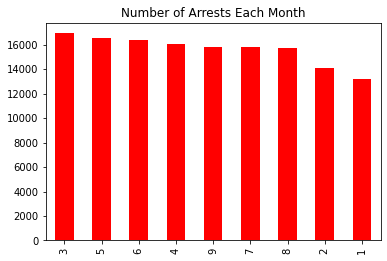

In [47]:
df.month.value_counts().plot(kind="bar", title = "Number of Arrests Each Month", color = 'red') # checking to see which month had the most arrests. March had the most arrest with 16940 arrests, however,
#the other months aren't far off. March, May, June and April all had over 16000 arrests, while september, july and august had over 15000, leaving february and January with over 14000 and 13000 respectively. 
#we don't have data from october, november and december. However, it seems safe to assume that total number of arrests decrease during winter months. 

In [48]:
df.Date.value_counts()# september 29 had the most arrest of 2022, i.e. between jan and september and January 29, 2022 had the least arrests.

2022-09-29    771
2022-09-07    767
2022-09-14    761
2022-06-01    748
2022-05-04    747
             ... 
2022-01-02    264
2022-01-28    257
2022-04-17    245
2022-01-30    243
2022-01-29    223
Name: Date, Length: 273, dtype: int64

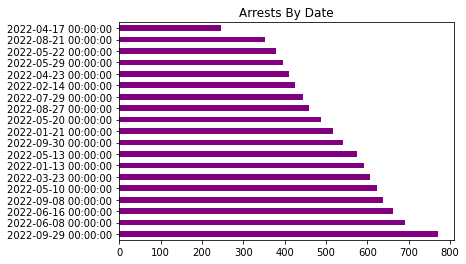

In [49]:
df.Date.value_counts().iloc[:273:15].plot(kind="barh", title = "Arrests By Date", color = 'purple') #i want to see what date had the most arrest

In [73]:
df_Date = df.loc[df['Date'] == '2022-09-29'] # creating a new df just for 9/29/2022 data called df_Date

In [75]:
df_Date.shape

(771, 13)

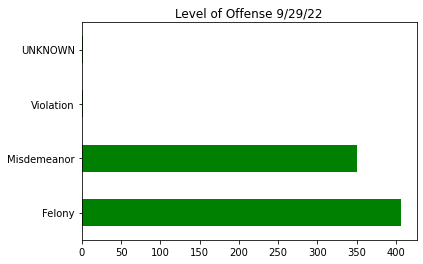

In [95]:
df_Date.Level_of_Offense.value_counts().plot(kind="barh", title = "Level of Offense 9/29/22", color = 'green')
#arrests were made mostly for Felonies, then Misdemeanor.

In [101]:
df_Date.Level_of_Offense.value_counts() # sometimes i have to see the exact number rather than looking at a graph.

Felony         406
Misdemeanor    351
Violation        1
UNKNOWN          1
Name: Level_of_Offense, dtype: int64

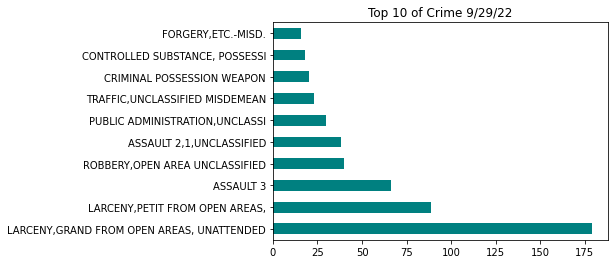

In [96]:
df_Date.PD_Description.value_counts().iloc[:10].plot(kind="barh", title = "Top 10 of Crime 9/29/22", color = 'teal') 
#top 10 crimes and number of arrests across the five boros just within on sept 29, 2022

In [79]:
df_Date.PD_Description.value_counts()

LARCENY,GRAND FROM OPEN AREAS, UNATTENDED    179
LARCENY,PETIT FROM OPEN AREAS,                89
ASSAULT 3                                     66
ROBBERY,OPEN AREA UNCLASSIFIED                40
ASSAULT 2,1,UNCLASSIFIED                      38
                                            ... 
RAPE 1                                         1
NY STATE LAWS,UNCLASSIFIED MIS                 1
IMPRISONMENT 2,UNLAWFUL                        1
BURGLARS TOOLS,UNCLASSIFIED                    1
LARCENY,GRAND OF AUTO                          1
Name: PD_Description, Length: 80, dtype: int64

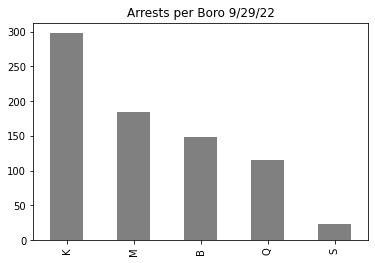

In [97]:
df_Date.Boro.value_counts().plot(kind="bar", title = "Arrests per Boro 9/29/22", color = 'grey') #Staten Island is the safest boro. This matches up with 
#overall data throughout the year with Kings county having the highest # of arrests, then Manhattan, Bronx, queens and last SI.

In [94]:
df_Date.Boro.value_counts()

K    298
M    185
B    149
Q    116
S     23
Name: Boro, dtype: int64

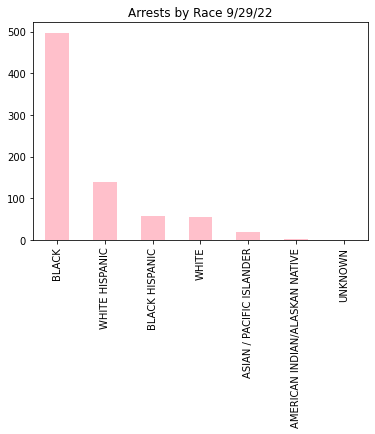

In [98]:
df_Date.Race.value_counts().plot(kind="bar", title = "Arrests by Race 9/29/22", color = 'pink')#this is someothing i've heard quite but this is the 
#first time i'm looking at the statistics myself. For race Blacks have the highest number of arrest on 9/29/22 and also in the overall data from jan-sept 2022

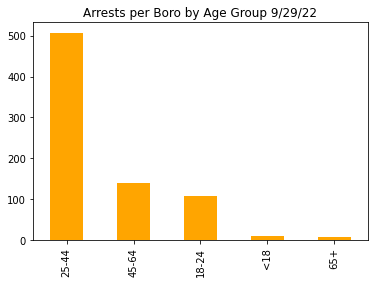

In [99]:
df_Date.Age_Group.value_counts().plot(kind="bar", title = "Arrests per Boro by Age Group 9/29/22", color = 'orange')
#people betweent the ages of 25-44 were mostly arrested on 9/29/22 or most likely to be arrested.

In [83]:
df1 = df_Date.loc[df['Boro'] == 'K'] # new dataframe for kings county/brooklyn
df2 = df_Date.loc[df['Boro'] == 'Q'] # new datafram for queens county
df_SI = df_Date.loc[df['Boro'] == 'S'] # new data frame for staten island
df1.head()

,Date,PD_CD,PD_Description,KY_CD,KY_Description,Level_of_Offense,Boro,Precinct,Age_Group,Sex,Race,Long_Lat,month
ARREST_KEY,,,,,,,,,,,,,
251773547,2022-09-29,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,Felony,K,84,25-44,M,BLACK,POINT (-73.983239 40.695404),9
251798950,2022-09-29,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,Misdemeanor,K,63,25-44,M,BLACK,POINT (-73.883818 40.585391),9
251804444,2022-09-29,750.0,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,Misdemeanor,K,62,25-44,M,BLACK HISPANIC,POINT (-73.995716 40.598905),9
251820612,2022-09-29,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,Felony,K,84,25-44,M,BLACK,POINT (-73.983239 40.695404),9
251773565,2022-09-29,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,Felony,K,84,25-44,M,BLACK,POINT (-73.983239 40.695404),9


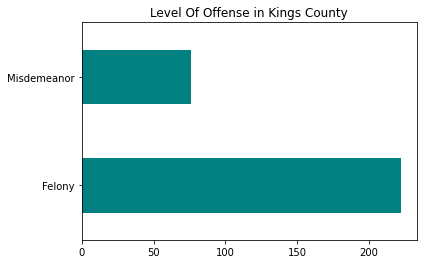

In [85]:
df1.Level_of_Offense.value_counts().plot(kind="barh", title = "Level Of Offense in Kings County", color = 'teal') 
#NYS has 3 levels of offense Felony, Misdemeanor and Violation/Infraction. on 9/29/22 arrests were made only for Felonies and Misdemeanor crimes in
#kings county

In [86]:
df1.PD_Description.value_counts().iloc[:10] #top 10 crimes in Kings county on sept 29, 2022

LARCENY,GRAND FROM OPEN AREAS, UNATTENDED    158
ASSAULT 3                                     20
CRIMINAL POSSESSION WEAPON                    10
PUBLIC ADMINISTRATION,UNCLASSI                 9
LARCENY,PETIT FROM OPEN AREAS,                 9
ROBBERY,OPEN AREA UNCLASSIFIED                 9
ASSAULT 2,1,UNCLASSIFIED                       6
CRIMINAL MIS 2 & 3                             5
MENACING,UNCLASSIFIED                          5
THEFT OF SERVICES, UNCLASSIFIE                 4
Name: PD_Description, dtype: int64

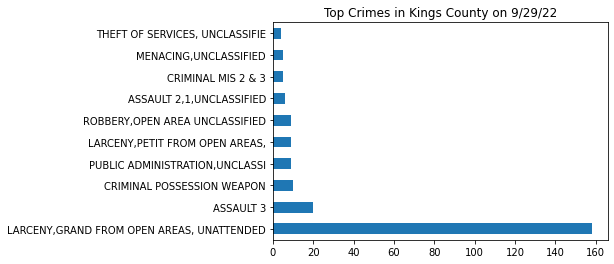

In [91]:
df1.PD_Description.value_counts().iloc[:10].plot(kind="barh", title = "Top Crimes in Kings County on 9/29/22")

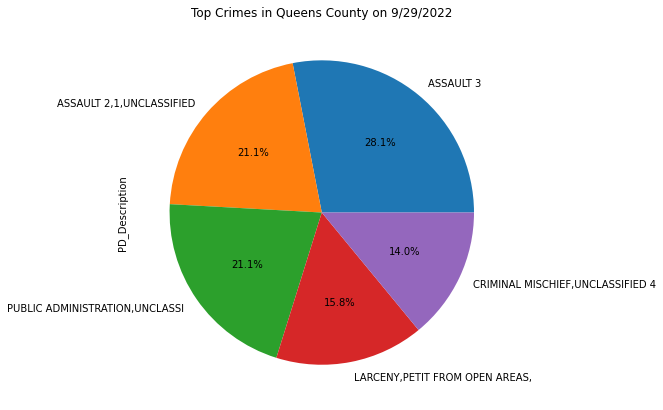

In [92]:
df2.PD_Description.value_counts().iloc[:5].plot(kind="pie", title = "Top Crimes in Queens County on 9/29/2022", autopct='%1.1f%%', figsize=(7,7))
#pie chart may not be the best way to represent this the percentages make it look like large numner of arrests. 

In [100]:
df2.PD_Description.value_counts().iloc[:5] #same info as above showing the number of arrest for top five crimes in queens on 9/29/22

ASSAULT 3                           16
ASSAULT 2,1,UNCLASSIFIED            12
PUBLIC ADMINISTRATION,UNCLASSI      12
LARCENY,PETIT FROM OPEN AREAS,       9
CRIMINAL MISCHIEF,UNCLASSIFIED 4     8
Name: PD_Description, dtype: int64

In [89]:
df_SI.PD_Description.value_counts().iloc[:10]#top 10 crimes in staten island on 9/29/22

CONTROLLED SUBSTANCE, POSSESSI    3
LARCENY,PETIT FROM OPEN AREAS,    3
FORGERY,ETC.-MISD.                2
CRIMINAL MIS 2 & 3                2
ROBBERY,OPEN AREA UNCLASSIFIED    2
CONTEMPT,CRIMINAL                 2
UNAUTHORIZED USE VEHICLE 3        1
RESISTING ARREST                  1
PUBLIC ADMINISTATION,UNCLASS M    1
MENACING,UNCLASSIFIED             1
Name: PD_Description, dtype: int64

**#Key Takeaways**
#Felony is the most serious crime in NY punishable by more than 1 year in prison, while misdemeanor is the second most serioud punishable by 15 to 1 year in prison, violation/infractions are less serious crimes. 
#In our data we see that almost 75000 of the arrests made from Jan 2022 - sept 2022 were charged for Misdemeanors, while over 63000 arrests were for Felonies while 1060 arrests were for less serious crimes like violations/Infractions
#330 of those were unknown.

#We don't have data from October, November and December. However, it seems safe to assume that total number of arrests decrease during winter months. I decided to look into september 29th, 2022, the day that had the most arrests. Out of 771 arrests 406 were charged with felonies, 351 with Misdemeanor and 1 violation and i was unknown. Kings county had the most arrests while Staten Island had the least, one reason for that could be that staten island has the lowest population while brookly has the highest amonst the five boros. The crimes that earn the majority of arrests on that day were grand larceny, petit larceny, assault and robbery. I was hoping to find some reason as to why arrests numbers were higher on this day but i failed to find anything. 

#While we can gather many many insights from this Data, there's not much we can do with only one year. Analysing this data for multiple years can be better if you are looking for patterns or changes or want to make predictions. 2022 was an interesting year because it's the year when things were getting close to normal after Covid. I would like to explore how crime was before, during and after covid. 

#This project helped to realize i've got quite alot to learn i did struggle to come up with a good research question and to make more meaningful visualization. I hope that with time and practice i can get better. 

#Other Information i just wanted to look at and practice

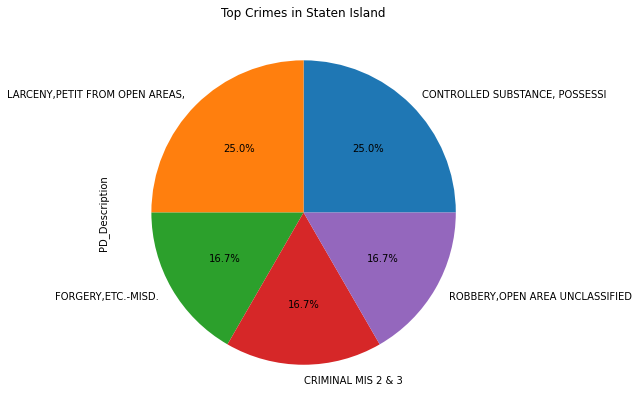

In [90]:
df_SI.PD_Description.value_counts().iloc[:5].plot(kind="pie", title = "Top Crimes in Staten Island", autopct='%1.1f%%', figsize=(7,7))

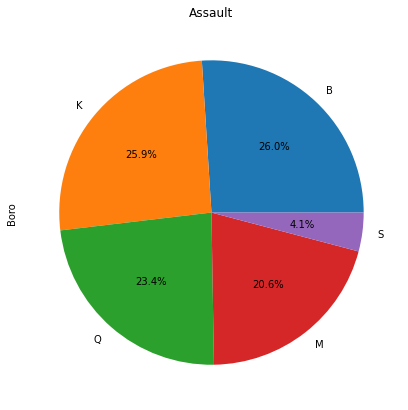

In [67]:
df_Assault = df.loc[df['PD_Description'] == 'ASSAULT 3']
df_Assault.Boro.value_counts().plot(kind='pie', title='Assault', autopct='%1.1f%%', figsize=(7,7))

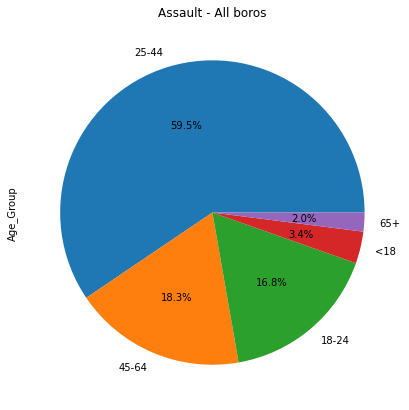

In [68]:
df_Assault.Age_Group.value_counts().plot(kind='pie', title='Assault - All boros', autopct='%1.1f%%', figsize=(7,7))

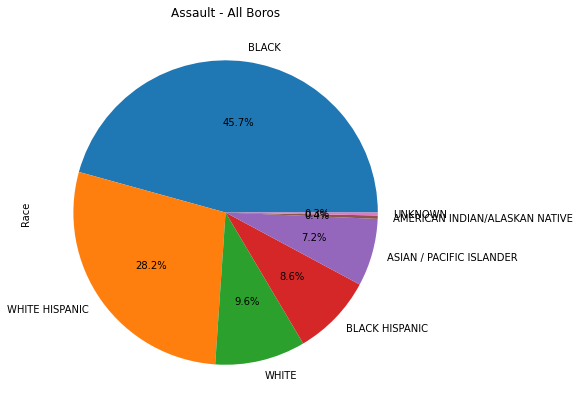

In [69]:
df_Assault.Race.value_counts().plot(kind='pie', title='Assault - All Boros', autopct='%1.1f%%', figsize=(7,7))

In [70]:
df_Assault.Boro.value_counts()

B    4389
K    4366
Q    3947
M    3481
S     694
Name: Boro, dtype: int64